T-TEST FOR BANK MARKETING

In [ ]:
pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
bank_marketing = fetch_ucirepo(id=222)

# data (as pandas dataframes)
X = bank_marketing.data.features
y = bank_marketing.data.targets

# metadata
print(bank_marketing.metadata)

# variable information
print(bank_marketing.variables)


{'uci_id': 222, 'name': 'Bank Marketing', 'repository_url': 'https://archive.ics.uci.edu/dataset/222/bank+marketing', 'data_url': 'https://archive.ics.uci.edu/static/public/222/data.csv', 'abstract': 'The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).', 'area': 'Business', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 45211, 'num_features': 16, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Occupation', 'Marital Status', 'Education Level'], 'target_col': ['y'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 2014, 'last_updated': 'Fri Aug 18 2023', 'dataset_doi': '10.24432/C5K306', 'creators': ['S. Moro', 'P. Rita', 'P. Cortez'], 'intro_paper': {'ID': 277, 'type': 'NATIVE', 'title': 'A data-driven approach to predict the s

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


In [ ]:
data = pd.read_csv("/content/bank-full-cleaned.csv")
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [ ]:
label_encoder = preprocessing.LabelEncoder()
data['age']= label_encoder.fit_transform(data['age'])
data['job']= label_encoder.fit_transform(data['job'])
data['marital']= label_encoder.fit_transform(data['marital'])
data['y']= label_encoder.fit_transform(data['y'])

data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,38,4,1,tertiary,no,2895,yes,no,unknown,5.0,may,261.0,1.0,-1.0,0.0,unknown,no
1,24,9,2,secondary,no,877,yes,no,unknown,5.0,may,151.0,1.0,-1.0,0.0,unknown,no
2,13,2,1,secondary,no,850,yes,yes,unknown,5.0,may,76.0,1.0,-1.0,0.0,unknown,no
3,27,1,1,unknown,no,2341,yes,no,unknown,5.0,may,92.0,1.0,-1.0,0.0,unknown,no
4,13,11,2,unknown,no,849,no,no,unknown,5.0,may,198.0,1.0,-1.0,0.0,unknown,no


In [ ]:
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from scipy.stats import ttest_ind
import numpy as np


data = pd.read_csv('/content/bank-full-cleaned.csv')
label_encoder = preprocessing.LabelEncoder()

categorical_cols = ["job", "marital"]
for col in categorical_cols:
    data[col] = label_encoder.fit_transform(data[col])

X = data[["job", "marital", "age"]]
y = data["campaign"]


Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, train_size=0.70, random_state=101)

logit = LogisticRegression(max_iter=1000)
logit.fit(Xtrain, ytrain)
pred1 = logit.predict(Xtest)

nb = GaussianNB()
nb.fit(Xtrain, ytrain)
pred2 = nb.predict(Xtest)

model1 = np.array(pred1)
model2 = np.array(pred2)

df1 = pd.DataFrame(model1, columns=["Model1"])
df2 = pd.DataFrame(model2, columns=["Model2"])

performance_data = pd.concat([df1, df2], axis=1)
performance_data.to_csv('Performance_Bank.csv', index=False)


t_statistic, p_value = ttest_ind(model1, model2)

# Print t-test results
print(f'T-statistic: {t_statistic}')
print(f'P-value: {p_value}')

alpha = 0.05

if p_value < alpha:
    print("Reject the null hypothesis.")
    print("There is a significant difference in the predictions of Model 1 and Model 2.")
else:
    print("Fail to reject the null hypothesis.")
    print("There is no significant difference in the predictions of Model 1 and Model 2.")

# z_statistic, p_value = ztest(model1, model2)
# print(f'T-statistic: {z_statistic}')
# print(f'P-value: {p_value}')


# alpha = 0.95
# if p_value < alpha:
#     print("Reject the null hypothesis.")
#     print("There is a significant difference in the accuracy of Model 1 and Model 2.")
#     if z_statistic > 0:
#         print("Model 1 is better than Model 2")
#     else:+

T-statistic: -83.16953898587589
P-value: 0.0
Reject the null hypothesis.
There is a significant difference in the predictions of Model 1 and Model 2.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


In [ ]:
print(data.dtypes)

age           int64
job           int64
marital       int64
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object


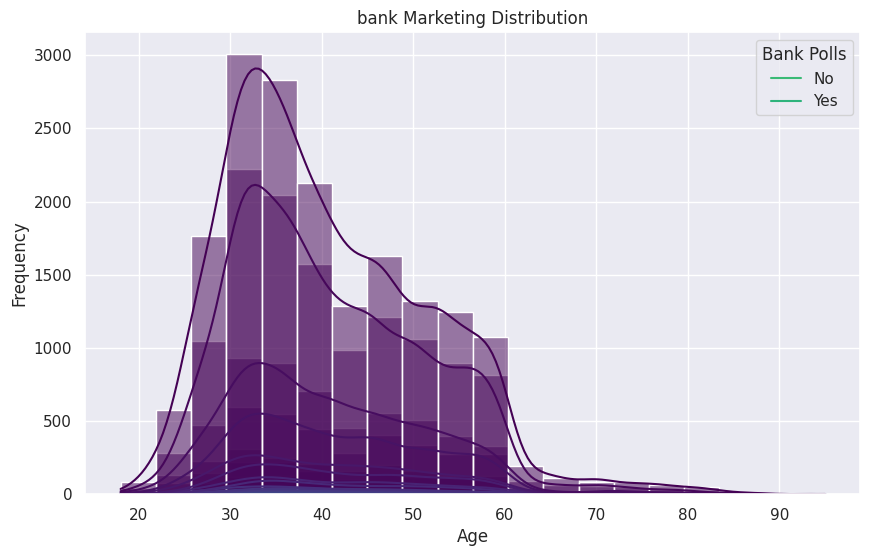

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
data = pd.read_csv('/content/bank-full-cleaned.csv')

sns.set(style="darkgrid")

plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='age', hue='campaign', kde=True, bins=20, palette='viridis')
plt.title('bank Marketing Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend(title='Bank Polls', labels=['No', 'Yes'])
plt.show()
plt.figure(figsize=(12, 8))



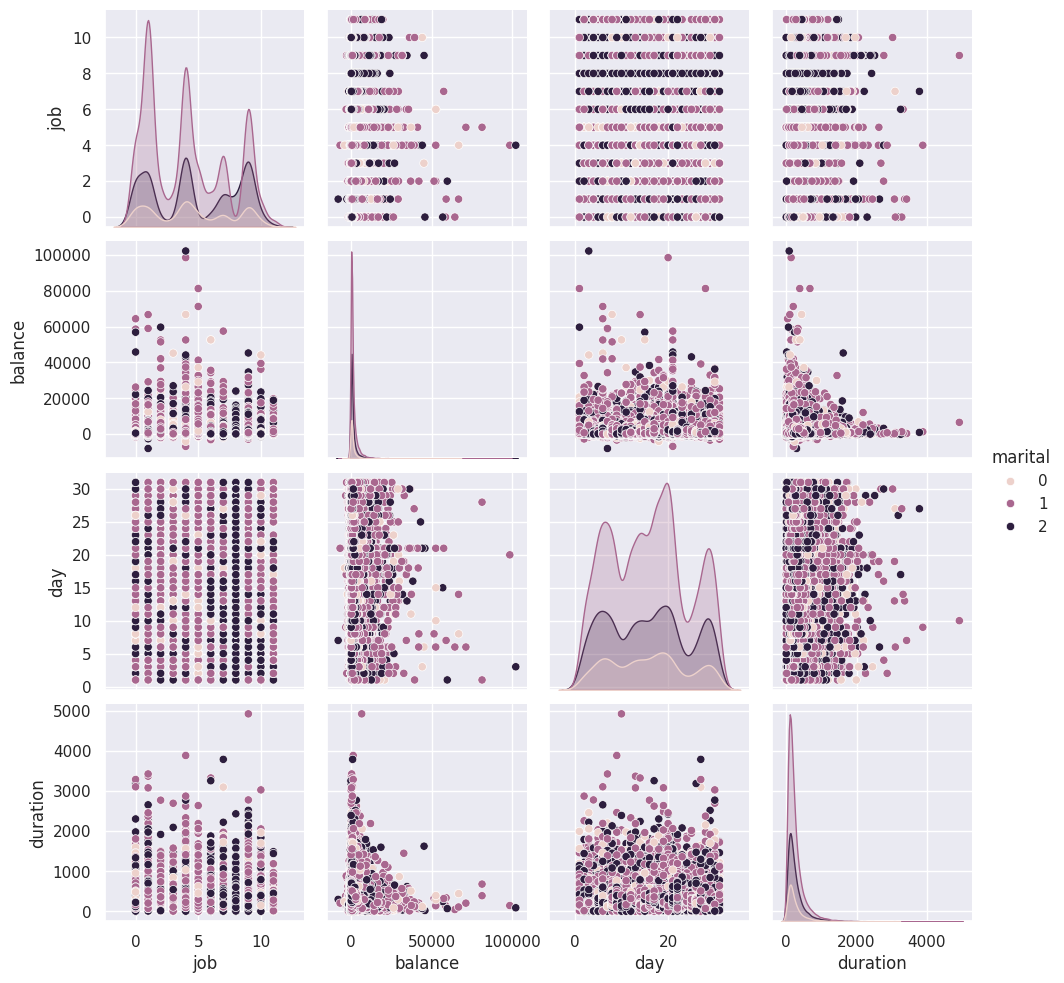

In [ ]:
df = pd.DataFrame(data, columns=data.columns[1:12])
sns.pairplot(df,hue='marital')


Z_TEST FOR BANK MARKETING

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from statsmodels.stats.weightstats import ztest
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

# K-Nearest Neighbors Classifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
pred1 = knn.predict(X_test)

# Random Forest Classifier
rf = RandomForestClassifier(max_depth=1, random_state=101)
rf.fit(X_train, y_train)
pred2 = rf.predict(X_test)

# Convert predictions to arrays for comparison
model1 = np.array(pred1)
model2 = np.array(pred2)

# Save predictions to a DataFrame
df1 = pd.DataFrame(model1, columns=["Model1"])
df2 = pd.DataFrame(model2, columns=["Model2"])
performance_data = pd.concat([df1, df2], axis=1)
performance_data.to_csv('Performance_Bank.csv', index=False)

# Perform t-test
z_statistic, p_value = ztest(model1, model2)
print(f'Z-statistic: {z_statistic}')
print(f'P-value: {p_value}')


alpha = 0.95
if p_value < alpha:
    print("Reject the null hypothesis.")
    print("There is a significant difference in the accuracy of Model 1 and Model 2.")
    if z_statistic > 0:
        print("Model 1 is better than Model 2")
    else:
        print("Model 2 is better than Model 1")
else:
    print("Fail to reject the null hypothesis.")
    print("There is no significant difference in the accuracy of Model 1 and Model 2.")


Z-statistic: -2.5125224397093544
P-value: 0.011987148133849296
Reject the null hypothesis.
There is a significant difference in the accuracy of Model 1 and Model 2.
Model 2 is better than Model 1


CHI-SQUARE TEST

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import chi2_contingency

# Assuming X and y are your features and labels
# Split the dataset

X = data[["job", "marital", "balance"]]
y = data["campaign"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

# K-Nearest Neighbors Classifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
pred1 = knn.predict(X_test)

# Random Forest Classifier
rf = RandomForestClassifier(max_depth=1, random_state=101)
rf.fit(X_train, y_train)
pred2 = rf.predict(X_test)

# Convert predictions to arrays for comparison
model1 = np.array(pred1)
model2 = np.array(pred2)

# Create a contingency table
contingency_table = pd.crosstab(model1, model2)

# Perform Chi-Square test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

# Print results
print(f"Chi-Square Statistic: {chi2_stat}")
print(f"P-value: {p_value}")
print(f"Degrees of Freedom: {dof}")
print(f"Expected Frequencies:\n{expected}")

# Decision based on p-value
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis.")
    print("There is a significant difference between Model 1 and Model 2 predictions.")
    if(chi2_stat > 0):
      print("Model 1 is better than Model 2.")
    else:
      print("Model 2 is better than Model 1")
else:
    print("Fail to reject the null hypothesis.")
    print("There is no significant difference between Model 1 and Model 2 predictions.")


Chi-Square Statistic: 0.0
P-value: 1.0
Degrees of Freedom: 0
Expected Frequencies:
[[8.987e+03]
 [3.533e+03]
 [7.090e+02]
 [2.080e+02]
 [5.800e+01]
 [5.000e+01]
 [4.000e+00]
 [8.000e+00]
 [4.000e+00]
 [2.000e+00]
 [1.000e+00]]
Fail to reject the null hypothesis.
There is no significant difference between Model 1 and Model 2 predictions.
